In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
import pandas as pd

df = pd.DataFrame(boston.data, columns=boston.feature_names)

df["price"] = boston.target

In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [6]:
df[df.columns].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
deviation = df[df.columns].std()
mean = df[df.columns].mean()

min = mean - 3 * deviation
max = mean + 3 * deviation

filter = (df > min) & (df < max)
filter_outliers = (df < min) | (df > max)

In [8]:
df_filtered = df[filter]

In [9]:
df_outliers = df[filter_outliers]

In [10]:
df_outliers.notna().sum()

CRIM        8
ZN         14
INDUS       0
CHAS       35
NOX         0
RM          8
AGE         0
DIS         5
RAD         0
TAX         0
PTRATIO     0
B          25
LSTAT       5
price       0
dtype: int64

In [11]:
df_filtered = df_filtered.dropna()

In [12]:
df_filtered

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [13]:
y = df_filtered["price"]
X = df_filtered.drop("price", axis=1)

In [14]:
from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split

regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [15]:
names = regressor.feature_names_in_.tolist()
values = regressor.coef_.tolist()

regressor_sorted = list(zip(names, values))

In [16]:
#regressor_sorted.sort(key=lambda x: x[1], reverse=True)
regressor_sorted.sort(key= lambda x: abs(x[1]), reverse=True)

In [17]:
values = [valor for nombre, valor in regressor_sorted]
nombres = [nombre for nombre, valor in regressor_sorted]

abs_values = [abs(valor) for nombre, valor in regressor_sorted]


fig 1


<Axes: >

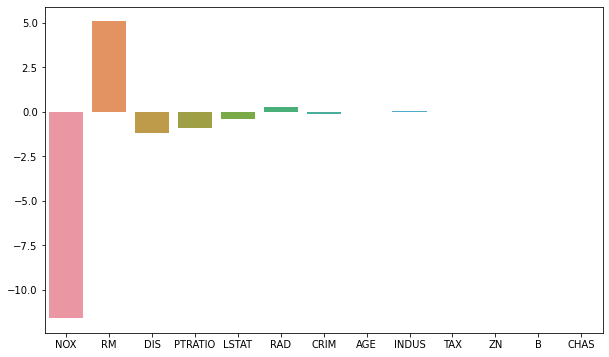

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

print("fig 1")

plt.figure(figsize=(10, 6))

sns.barplot(x=nombres, y=values)

fig 2


<Axes: >

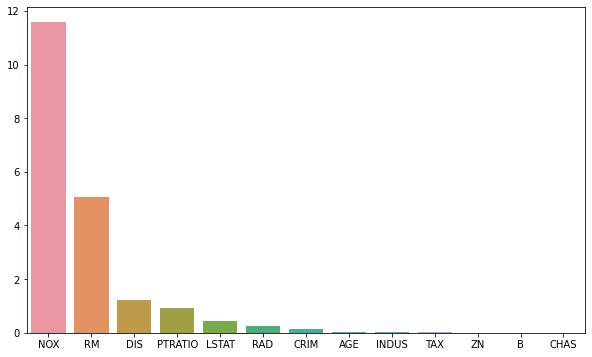

In [19]:
print("fig 2")

plt.figure(figsize=(10, 6))
sns.barplot(x=nombres, y=abs_values)

By using a linear regression we can see the relationships between the features and the target.

On fig one we can see the features orderes by the impact they have on the price. For example, the
amount nitric oxides concentration (NOX) reduces drastically the price when it rises a little.
On the other hand, the number of rooms (RM) are directly connected with the price.

fig 3


<Axes: xlabel='price', ylabel='Count'>

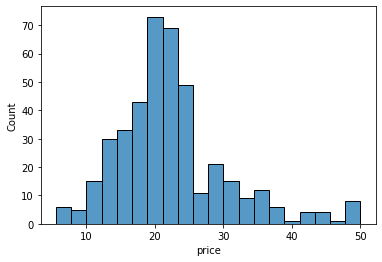

In [47]:
print("fig 3")
sns.histplot(data=df_filtered.price, bins=20)

fig 4


<Axes: xlabel='NOX', ylabel='price'>

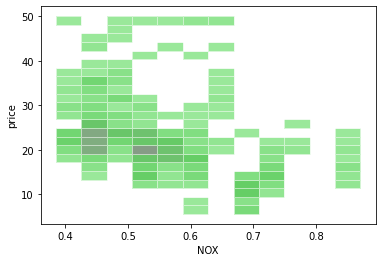

In [41]:
print("fig 4")
sns.histplot(data=df_filtered, x="NOX", y="price", alpha=0.6, edgecolors='w', color='green')

fig 5


<Axes: xlabel='RM', ylabel='price'>

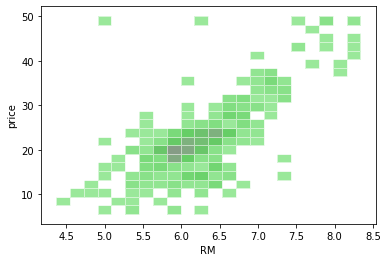

In [42]:
print("fig 5")
sns.histplot(data=df_filtered, x="RM", y="price", alpha=0.6, edgecolors='w', color='green')

fig 6


<Axes: xlabel='DIS', ylabel='price'>

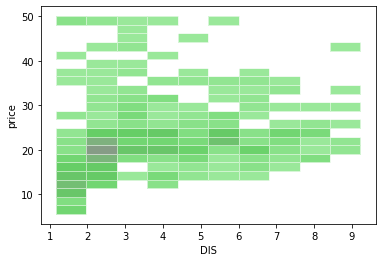

In [43]:
print("fig 6")
sns.histplot(data=df_filtered, x="DIS", y="price", alpha=0.6, edgecolors='w', color='green')

fig 7


<Axes: xlabel='PTRATIO', ylabel='price'>

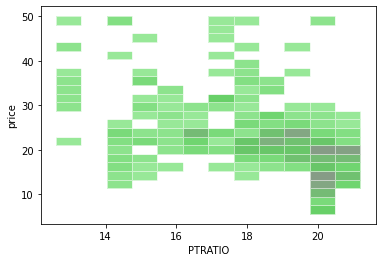

In [49]:
print("fig 7")
sns.histplot(data=df_filtered, x="PTRATIO", y="price", alpha=0.6, edgecolors='w', color='green')

fig 8


<Axes: xlabel='LSTAT', ylabel='price'>

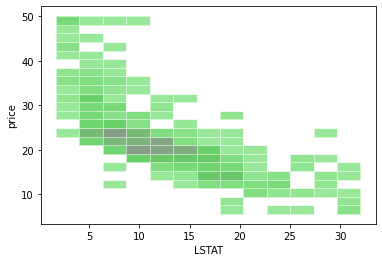

In [51]:
print("fig 8")
sns.histplot(data=df_filtered, x="LSTAT", y="price", alpha=0.6, edgecolors='w', color='green')

<Axes: xlabel='RAD', ylabel='price'>

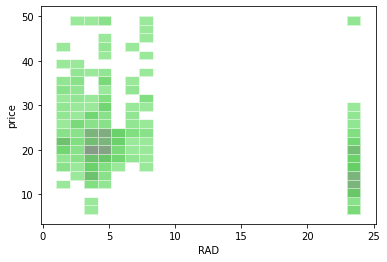

In [52]:
sns.histplot(data=df_filtered, x="RAD", y="price", alpha=0.6, edgecolors='w', color='green')

Linear Regression can show the importance of features, but we have to be careful using it, since
it can lead to missinterpretation due to the nonlinearities data can present. 

Now I will try to apply clustering to this data and then analyze the resultant clusters.

In [28]:
df_filtered.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
